# Regressão polinomial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import linear_regression_models as lin
import common as com

data_table = pd.DataFrame({'Salário': [1500, 2000, 3000, 3300, 4200, 5500],
                           'Crédito': [16500, 18000, 28000, 33000, 49000, 52000]},
                   dtype='float')

display(data_table)
x = data_table.drop('Crédito', axis=1).values
y = data_table['Crédito'].values
x_new = np.array([ np.linspace(x_range[0], x_range[1], 100) for x_range in zip(np.min(x, axis=0), np.max(x, axis=0)) ]).transpose()

,Salário,Crédito
0,1500.0,16500.0
1,2000.0,18000.0
2,3000.0,28000.0
3,3300.0,33000.0
4,4200.0,49000.0
5,5500.0,52000.0


## Normalização dos dados

In [2]:
normalize_data = True

if normalize_data:
    x_original = x.copy()
    y_original = y.copy()
    
    x = com.normalize_data(x, ignore_first=False)['data']
    y = com.normalize_data(y, ignore_first=False)['data']

## Variáveis comuns

In [3]:
poly_order = 3

x_new = np.linspace(min(x), max(x), 100)[:,None]
x_new_matrix = lin.build_poly_regressors(x_new, poly_order=poly_order)

## Solução iterativa via gradiente descendente

In [4]:
model_gd = lin.gd(x=x, y=y, poly_order=poly_order, alpha=0.05, num_epochs=200*x.shape[0], build_regressors=True) 
w_gd = model_gd['w']    
mse_history_gd = model_gd['mse_history']
mse_gd = mse_history_gd[-1]

print("Parâmetros obtidos via GD")
print(w_gd) 
print("MSE após o treinamento")
print("%e" % mse_gd) 

Parâmetros obtidos via GD
[ 0.00257953  1.66767436  0.12476339 -0.36708362]
MSE após o treinamento
2.495934e-03


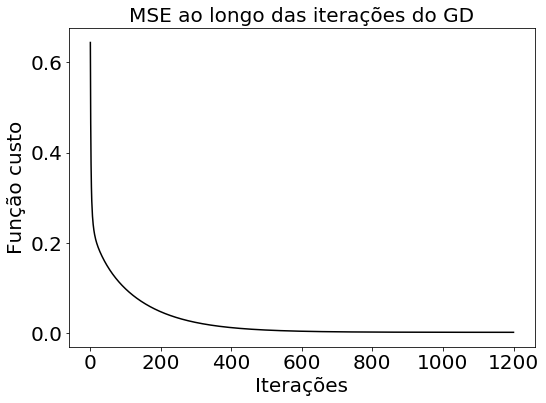

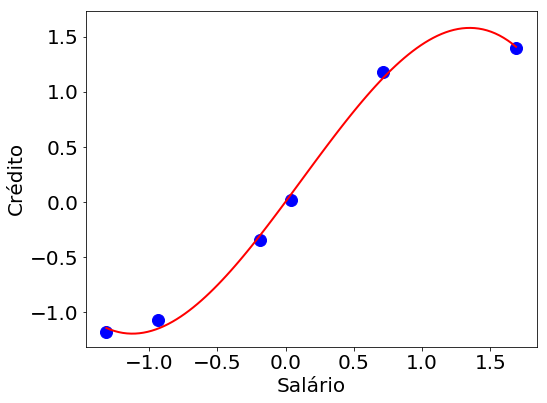

In [5]:
com.plot_loss_path(mse_history_gd, 'MSE ao longo das iterações do GD')
com.plot_regression_line(x=x, y=y, x_new=x_new_matrix, w=w_gd,
                         save=False, file_name='linear_poly_reg_gd.png',
                         xlab="Salário", ylab="Crédito")

## Solução iterativa via gradiente descendente estocástico (LMS)

In [6]:
model_lms = lin.lms(x=x, y=y, poly_order=poly_order, alpha=0.05, num_epochs=200, build_regressors=True) 
w_lms = model_lms['w']    
mse_history_lms = model_lms['mse_history']
mse_lms = mse_history_lms[-1]

print("Parâmetros obtidos via LMS")
print(w_lms) 
print("MSE após o treinamento")
print("%e" % mse_lms) 

Parâmetros obtidos via LMS
[ 0.00191931  1.66890553  0.1212761  -0.3633817 ]
MSE após o treinamento
2.571316e-03


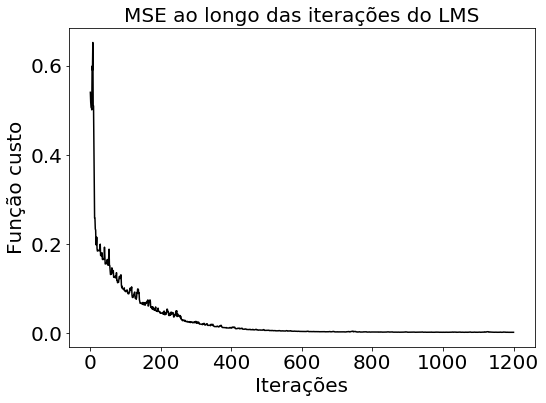

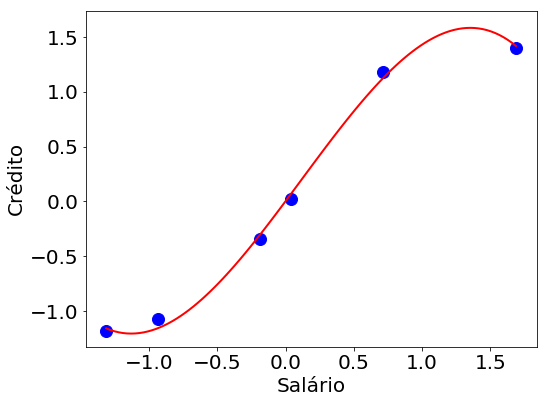

In [7]:
com.plot_loss_path(mse_history_lms, 'MSE ao longo das iterações do LMS')
com.plot_regression_line(x=x, y=y, x_new=x_new_matrix, w=w_lms,
                         save=False, file_name='linear_poly_reg_lms.png',
                         xlab="Salário", ylab="Crédito")

## Solução em batch via OLS

Parâmetros obtidos via OLS
[ 5.92554241e-04  1.68459549e+00  1.29575375e-01 -3.75658697e-01]
MSE após o treinamento
2.467441e-03


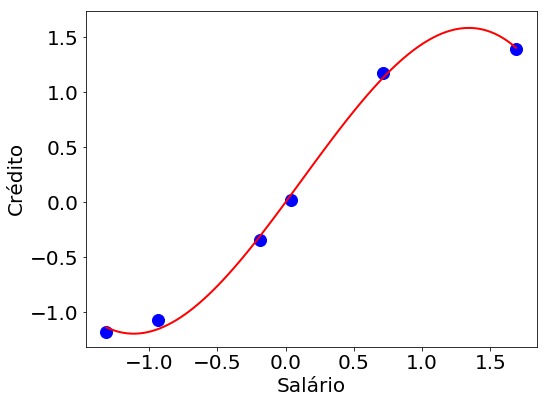

In [8]:
model_ols = lin.ols(x=x, y=y, poly_order=poly_order, build_regressors=True) 
w_ols = model_ols['w']
mse_ols = model_ols['mse']

print("Parâmetros obtidos via OLS")
print(w_ols)
print("MSE após o treinamento")
print("%e" % mse_ols) 

com.plot_regression_line(x=x, y=y, x_new=x_new_matrix, w=w_ols,
                         save=False, file_name='linear_poly_reg_gd.png',
                         xlab="Salário", ylab="Crédito")

In [9]:
print("MSE obtido via GD: %.3e" % mse_gd)
print("Parâmetros obtidos via GD:\n%s\n" % w_gd)

print("MSE obtido via LMS: %.3e" % mse_lms)
print("Parâmetros obtidos via LMS:\n%s\n" % w_lms)

print("MSE obtido via OLS: %.3e" % mse_ols)
print("Parâmetros obtidos via OLS:\n%s\n" % w_ols)

MSE obtido via GD: 2.496e-03
Parâmetros obtidos via GD:
[ 0.00257953  1.66767436  0.12476339 -0.36708362]

MSE obtido via LMS: 2.571e-03
Parâmetros obtidos via LMS:
[ 0.00191931  1.66890553  0.1212761  -0.3633817 ]

MSE obtido via OLS: 2.467e-03
Parâmetros obtidos via OLS:
[ 5.92554241e-04  1.68459549e+00  1.29575375e-01 -3.75658697e-01]



## Variando a ordem do polinômio

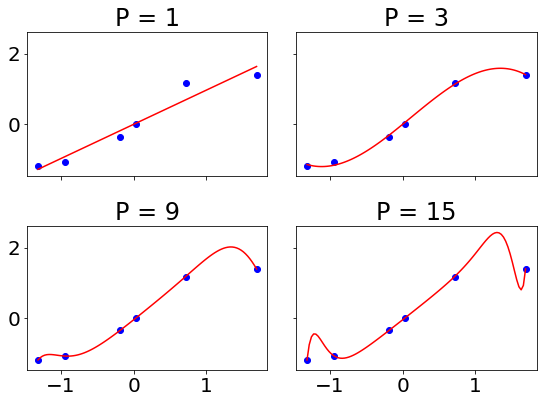

In [10]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=com.figsize)

orders = [1, 3, 9, 15]
for i, order in enumerate(orders):
    model_ols = lin.ols(x=x, y=y, poly_order=order, build_regressors=True) 
    w_ols = model_ols['w']
    plot_matrix = lin.build_poly_regressors(x_new, poly_order=order)
    axs.flatten()[i].plot(x, y, 'ob')
    axs.flatten()[i].plot(plot_matrix[:,1], plot_matrix @ w_ols, '-r')
    axs.flatten()[i].set_title("P = " + str(order))
#plt.savefig('var_order_poly_reg', dpi=com.dpi)